   ## Relationship between Euler's Method and Discrete-time Model

Euler's forward method is very similar to a discrete time model. In Euler's method, small increases and decreases in x (a state variable) are accumulated over changes in time. This is a discretized formula whose solution approaches the true solution of the original (continuous) differential equation as the change in time approaches 0 (lim delta T --> 0). As the discrete time steps get smaller and smaller, the model becomes a closer and closer approximation of a continuous-time model. This is similar to how the summed areas of smaller and smaller triangles within a circle can become a more and more accurate approximation of the area of the circle. In a discrete model, the change in time/delta t is always +1, but in the Euler method, delta t becomes smaller and smaller and not always be one. 

In [63]:
from pylab import *

In [64]:
import ipywidgets as widgets

In [65]:
from IPython.display import display

## Euler's Method

In [129]:
#K= carrying capacity of system
#r= rate/coefficient that determines change in state variable x per time step h

def initialize():
    global x, result, t, timesteps
    #initial state of x
    x= 0.1
    result = [x]
    #initial time
    t= 0.
    timesteps= [t]

In [130]:
def observe():
    global x, result, t, timesteps
    result.append(x)
    timesteps.append(t)

In [160]:
#h= delta t/change in time/step size
def update(h, r, K):
    global x, result, t, timesteps
    #new x = old x plus change in x, adjusted for capacity, times h/step size
    x= x + r * x**2 * (1-x/K) * h
    t= t +  h

In [161]:
#Slider to control h/timestep size if desired
w1 = widgets.FloatSlider(
    min=0.001,
    max=10.,
    step=0.001,
    description='h=',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='0.3f')
display(w1)

FloatSlider(value=0.001, description='h=', max=10.0, min=0.001, readout_format='0.3f', step=0.001)

In [147]:
#Slider to control h/timestep size
w2 = widgets.FloatSlider(
    min=0.001,
    max=10.,
    step=0.001,
    description='h=',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='0.3f')
display(w2)

FloatSlider(value=0.001, description='h=', max=10.0, min=0.001, readout_format='0.3f', step=0.001)

In [162]:
#to show difference between low h and high h
h1= w1.value
h2= w2.value

In [163]:
initialize()
while t < 100:
    update(h1, 0.2, 1.0)
    observe()
timesteps1= timesteps
result1= result

In [164]:
initialize()
while t < 100:
    update(h2, 0.2, 1.0)
    observe()
timesteps2= timesteps
result2= result

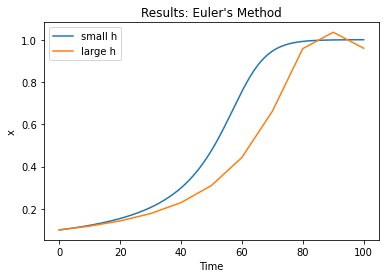

In [165]:
plot(timesteps1, result1, label='small h')
plot(timesteps2, result2, label='large h')
xlabel('Time')
ylabel('x')
title('Results: Euler\'s Method')
legend()
savefig('Small h vs Large H.png')

## Heun's Method

In [43]:
#initialize and observe steps can be the same, need to change the update step only

In [166]:
def update_e(h, r, K):
    global x, result, t, timesteps
    #new x = old x plus change in x, adjusted for capacity, times h/step size
    xe= x + r * x**2 * (1-x/K) * h
    x= x + (((r * x**2 * (1-x/K))+(r * xe**2 * (1-x/K)))/2) * h
    t= t +  h

In [172]:
initialize()
while t < 100:
    update_e(h1, 0.2, 1.0)
    observe()
timesteps1e= timesteps
result1e= result

In [173]:
initialize()
while t < 100:
    update(10, 0.2, 1.0)
    observe()
timesteps2e= timesteps
result2e= result

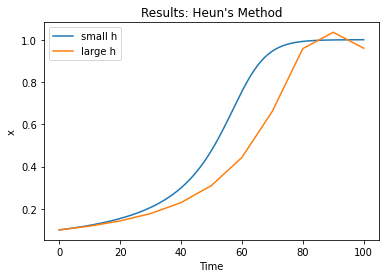

In [174]:
plot(timesteps1e, result1e, label='small h')
plot(timesteps2e, result2e, label='large h')
xlabel('Time')
ylabel('x')
title('Results: Heun\'s Method')
legend()
#savefig('Small h vs Large H Heun.png')

## Euler's Method, SIS Model

In [68]:
#let's make it more like an SIS model
#now there are 2 variables involved, S and I
#K is now N which is S + I, the total # in population 

This is the part not working very well 

In [100]:
#need to tweak initialize and observe a bit on this one

def Initialize(N):
    global S, I, resultS, resultI, t, timesteps
    #initial state of x
    S= N-1
    #start with 1 infected?)
    I= 1
    N= N
    resultS = [S]
    resultI= [I]
    #initial time
    t= 0.
    timesteps= [t]
    
def Observe():
    global S, I, N, resultS, resultI, t, timesteps
    #could also have it be tuples but this makes plotting easier 
    resultS.append(S)
    resultI.append(I)
    timesteps.append(t)


In [101]:
#h is still timestep, B is Beta/infection rate, a is alpha/recovery rate
def Update(h, B, a):
    global S, I, N, resultS, resultI, t, timesteps
    #I= I + (B*S*I - a*I) * h
    #S= S + (-B*S*I + a*I)* h
    I= I + (B*N-a)*I*h
    t= t +  h

In [102]:
Initialize(1000)

In [103]:
while t < 100:
    Update(0.01, 2.0, 1.5)
    Observe()
Timesteps= timesteps
susceptible= resultS
infected= resultI

NameError: name 'N' is not defined

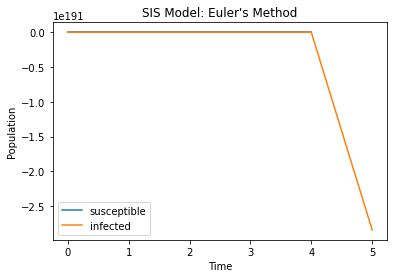

In [93]:
plot(timesteps, susceptible, label='susceptible')
plot(timesteps, infected, label='infected')
xlabel('Time')
ylabel('Population')
title('SIS Model: Euler\'s Method')
legend()
#savefig('Small h vs Large H Heun.png')